<a href="https://www.kaggle.com/code/rkmaurya93/regularization?scriptVersionId=256653406" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

2025-08-18 16:22:46.553247: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755534166.816125      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755534166.894325      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
from sklearn.datasets import make_moons

In [4]:
x,y=make_moons(100,noise=0.25,random_state=2)

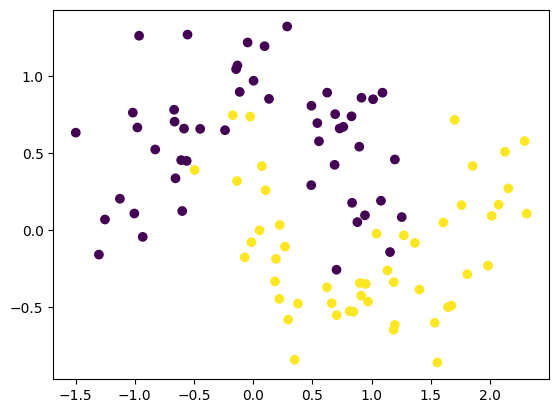

In [5]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [6]:
model=Sequential()
model.add(Dense(128,input_dim=2,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-18 16:23:02.299071: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
adam1=Adam(learning_rate=0.01)
model.compile(optimizer=adam1,loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history1=model.fit(x,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 975us/step


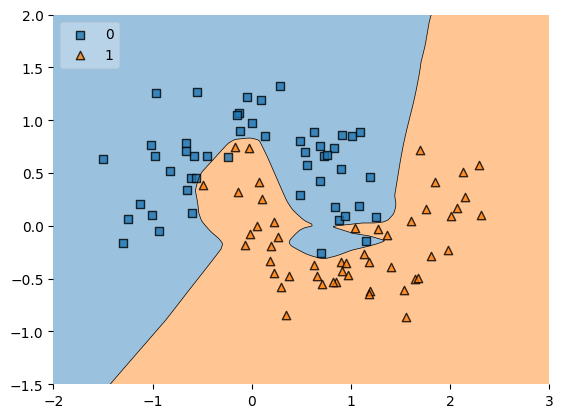

In [10]:
plot_decision_regions(x,y.astype('int'),clf=model,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

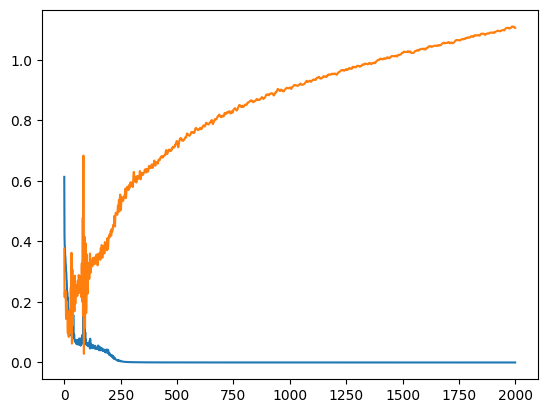

In [11]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [12]:
model2=Sequential()
model2.add(Dense(128, input_dim=2, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dense(1, activation='sigmoid'))

In [13]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
adam2=Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam2, metrics=['accuracy'])

In [15]:
history2= model2.fit(x, y, epochs=2000, validation_split=0.2, verbose=1)

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - accuracy: 0.6484 - loss: 4.2687 - val_accuracy: 0.9000 - val_loss: 2.7037
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8148 - loss: 2.4849 - val_accuracy: 0.9000 - val_loss: 1.4908
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7867 - loss: 1.4418 - val_accuracy: 0.9000 - val_loss: 0.8635
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8305 - loss: 0.8894 - val_accuracy: 0.9000 - val_loss: 0.5944
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8281 - loss: 0.6596 - val_accuracy: 0.9000 - val_loss: 0.5063
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8266 - loss: 0.6235 - val_accuracy: 0.9000 - val_loss: 0.5753
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8484 - loss: 0.6391 - val_accuracy: 0.9000 - val_loss: 0.5291
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8539 - loss: 0.6373 - val_accuracy: 0.9000 - 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


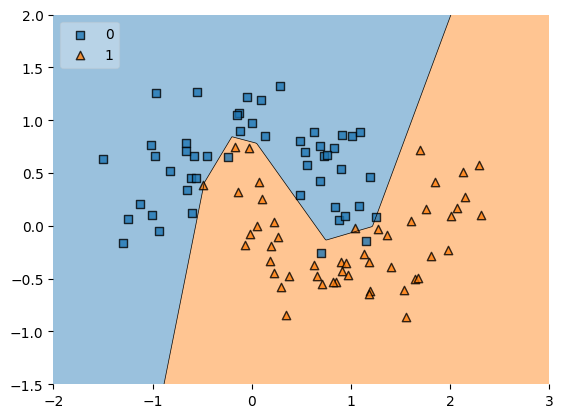

In [16]:
plot_decision_regions(x,y.astype('int'),clf=model2,legend=2)
plt.xlim(-2, 3)
plt.ylim(-1.5, 2)
plt.show()

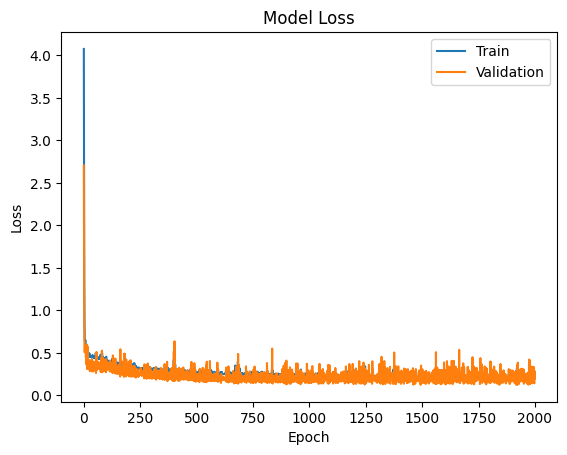

In [17]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [18]:
model_weight_layer1 = model.get_weights()[0].reshape(256)
model_weight_layer2 = model2.get_weights()[0].reshape(256)

<Axes: >

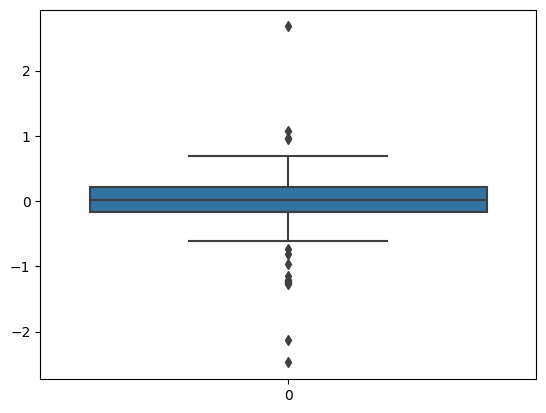

In [19]:
sns.boxplot(model_weight_layer1)

<Axes: >

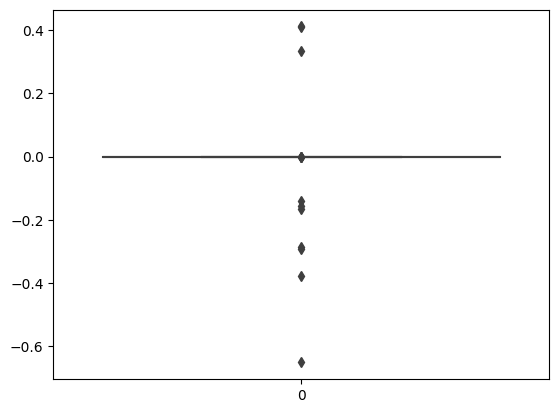

In [20]:
sns.boxplot(model_weight_layer2)

In [21]:
model_weight_layer1.max()

2.6748223

In [22]:
model_weight_layer2.max()

0.41161275

In [23]:
model_weight_layer2.min()


-0.65131134

/tmp/ipykernel_13/424806799.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_weight_layer1)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_13/424806799.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For 

<Axes: ylabel='Density'>

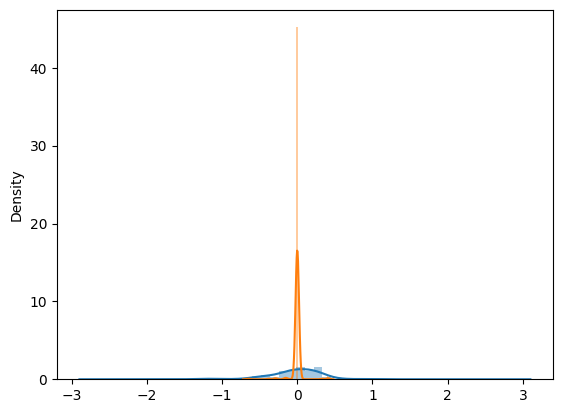

In [24]:
sns.distplot(model_weight_layer1)
sns.distplot(model_weight_layer2)